In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sales= pd.read_csv("Walmart_Store_sales.csv")
sales.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:

sales['Date']= pd.to_datetime(sales['Date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [5]:
sales.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
sales['Day']= pd.DatetimeIndex(sales['Date']).day
sales['Month']= pd.DatetimeIndex(sales['Date']).month
sales['Year']= pd.DatetimeIndex(sales['Date']).year
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


In [7]:
sales_tot = sales.groupby('Store')['Weekly_Sales'].sum().sort_values() 
sales_tot_arr = np.array(sales_tot) 
sales_tot

Store
33    3.716022e+07
44    4.329309e+07
5     4.547569e+07
36    5.341221e+07
38    5.515963e+07
3     5.758674e+07
30    6.271689e+07
37    7.420274e+07
16    7.425243e+07
29    7.714155e+07
9     7.778922e+07
42    7.956575e+07
7     8.159828e+07
15    8.913368e+07
43    9.056544e+07
25    1.010612e+08
21    1.081179e+08
45    1.123953e+08
17    1.277821e+08
8     1.299512e+08
35    1.315207e+08
40    1.378703e+08
34    1.382498e+08
26    1.434164e+08
12    1.442872e+08
22    1.470756e+08
18    1.551147e+08
32    1.668192e+08
41    1.813419e+08
28    1.892637e+08
11    1.939628e+08
24    1.940160e+08
23    1.987506e+08
31    1.996139e+08
19    2.066349e+08
39    2.074455e+08
1     2.224028e+08
6     2.237561e+08
27    2.538559e+08
10    2.716177e+08
2     2.753824e+08
13    2.865177e+08
14    2.889999e+08
4     2.995440e+08
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

Text(0, 0.5, 'Sales Amount')

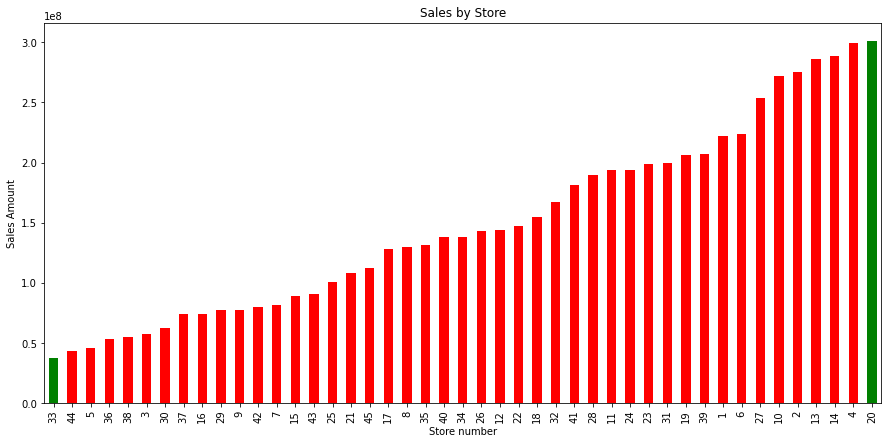

In [8]:
#Store having maximum sales

plt.figure(figsize=(15,7))
clrs = ['Red' if ((x < max(sales_tot_arr)) 
                             and (x > min(sales_tot_arr))) else 'Green' for x in sales_tot_arr]
ax = sales_tot.plot(kind='bar',color=clrs)

plt.title('Sales by Store')
plt.xlabel('Store number')
plt.ylabel('Sales Amount')


In [9]:
#Store having maximum standard deviation

sales_std = sales.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False) 
print("The Store with maximum std deviation is"+ str(sales_std.head(1)))


The Store with maximum std deviation isStore
14    317569.949476
Name: Weekly_Sales, dtype: float64


In [10]:
#co-efficient of mean to standard deviation

sales_coeff = sales.groupby('Store')['Weekly_Sales'].std()/sales.groupby('Store')['Weekly_Sales'].mean()
sales_coeff

Store
1     0.100292
2     0.123424
3     0.115021
4     0.127083
5     0.118668
6     0.135823
7     0.197305
8     0.116953
9     0.126895
10    0.159133
11    0.122262
12    0.137925
13    0.132514
14    0.157137
15    0.193384
16    0.165181
17    0.125521
18    0.162845
19    0.132680
20    0.130903
21    0.170292
22    0.156783
23    0.179721
24    0.123637
25    0.159860
26    0.110111
27    0.135155
28    0.137330
29    0.183742
30    0.052008
31    0.090161
32    0.118310
33    0.092868
34    0.108225
35    0.229681
36    0.162579
37    0.042084
38    0.110875
39    0.149908
40    0.123430
41    0.148177
42    0.090335
43    0.064104
44    0.081793
45    0.165613
Name: Weekly_Sales, dtype: float64

In [11]:
#Store having good quarterly growth rate in Q3'2012

sales_Q3 = sales[(sales['Date']>'2012-07-01')& 
                 (sales['Date']< '2012-09-30')].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False) 
sales_Q3.head()


Store
4     25652119.35
20    24665938.11
13    24319994.35
2     22396867.61
10    21169356.45
Name: Weekly_Sales, dtype: float64

In [12]:
# Some holidays have a negative impact on sales. 
#Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

holidayweek_sale_sum=sales[sales['Holiday_Flag']==1].groupby('Date').agg({"Weekly_Sales":'sum'}).reset_index()
holidayweek_sale_sum

,Date,Weekly_Sales
0,2010-10-09,45634397.84
1,2010-11-26,65821003.24
2,2010-12-02,48336677.63
3,2010-12-31,40432519.00
4,2011-09-09,46763227.53
5,2011-11-02,47336192.79
6,2011-11-25,66593605.26
7,2011-12-30,46042461.04
8,2012-07-09,48330059.31
9,2012-10-02,50009407.92


In [13]:
mean_non_holiday=sales[sales['Holiday_Flag']==0].groupby('Date').agg({"Weekly_Sales":'mean'}).reset_index()
mean_non_holiday

,Date,Weekly_Sales
0,2010-01-10,9.386639e+05
1,2010-02-04,1.120530e+06
2,2010-02-07,1.087055e+06
3,2010-02-19,1.072822e+06
4,2010-02-26,9.770794e+05
...,...,...
128,2012-10-08,1.053410e+06
129,2012-10-19,1.002720e+06
130,2012-10-26,1.012091e+06
131,2012-11-05,1.042797e+06


In [14]:
print("Holidays whose sales are higher than non-holiday sales")
for X in holidayweek_sale_sum.itertuples():
    for X1 in mean_non_holiday.itertuples():
        if X.Weekly_Sales > X1.Weekly_Sales:
            print("On Date {} , sale {}"
                  .format(X.Date,X.Weekly_Sales))
            break;

Holidays whose sales are higher than non-holiday sales
On Date 2010-10-09 00:00:00 , sale 45634397.839999996
On Date 2010-11-26 00:00:00 , sale 65821003.24
On Date 2010-12-02 00:00:00 , sale 48336677.63
On Date 2010-12-31 00:00:00 , sale 40432519.0
On Date 2011-09-09 00:00:00 , sale 46763227.53
On Date 2011-11-02 00:00:00 , sale 47336192.79
On Date 2011-11-25 00:00:00 , sale 66593605.26
On Date 2011-12-30 00:00:00 , sale 46042461.04
On Date 2012-07-09 00:00:00 , sale 48330059.31
On Date 2012-10-02 00:00:00 , sale 50009407.92


In [15]:
# monthly view of sales in units and give insights
sales_2010=sales.loc[sales["Year"]==2010]
sales_2011=sales.loc[sales["Year"]==2011]
sales_2012=sales.loc[sales["Year"]==2012]

In [16]:
sales_2010.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


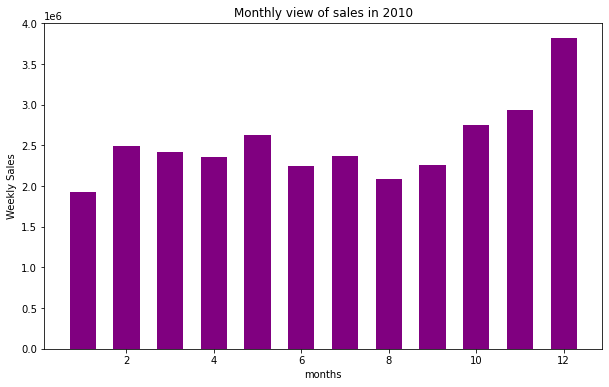

In [17]:
#sales in 2010
plt.figure(figsize=(10,6))
plt.bar(sales_2010["Month"],sales_2010["Weekly_Sales"],color ='purple',width = 0.6)
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

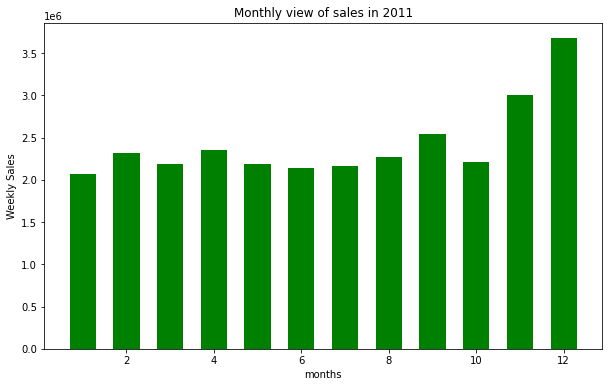

In [19]:
#sales in 2011
plt.figure(figsize=(10,6))
plt.bar(sales_2011["Month"],sales_2011["Weekly_Sales"],color ='Green',width = 0.6)
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

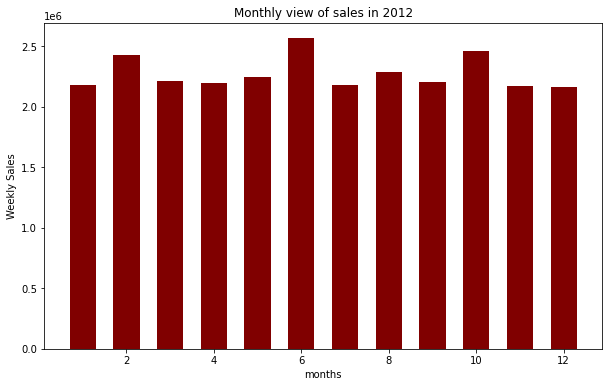

In [18]:
#sales in 2012
plt.figure(figsize=(10,6))
plt.bar(sales_2012["Month"],sales_2012["Weekly_Sales"],color ='maroon',width = 0.6)
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

In [28]:
#Semester view of sales

sem1_2010 = sales_2010.loc[sales_2010["Month"]<7,["Weekly_Sales"]].sum()
sem2_2010 = sales_2010.loc[sales_2010["Month"]>6,["Weekly_Sales"]].sum()
sem1_2011 = sales_2011.loc[sales_2011["Month"]<7,["Weekly_Sales"]].sum()
sem2_2011 = sales_2011.loc[sales_2011["Month"]>6,["Weekly_Sales"]].sum()
sem1_2012 = sales_2012.loc[sales_2012["Month"]<7,["Weekly_Sales"]].sum()
sem2_2012 = sales_2012.loc[sales_2012["Month"]>6,["Weekly_Sales"]].sum()


Weekly_Sales    1.163004e+09
dtype: float64

In [34]:
data = [sem1_2010,sem2_2010,sem1_2011,sem2_2011,sem1_2012,sem2_2012]
walmart_df = pd.DataFrame(data,index=['sem1_2010','sem2_2010','sem1_2011','sem2_2011','sem1_2012','sem2_2012'])

In [35]:
walmart_df


,Weekly_Sales
sem1_2010,1.026913e+09
sem2_2010,1.261973e+09
sem1_2011,1.138060e+09
sem2_2011,1.310140e+09
sem1_2012,1.163004e+09
sem2_2012,8.371288e+08


Text(0.5, 1.0, 'Semester view of sales')

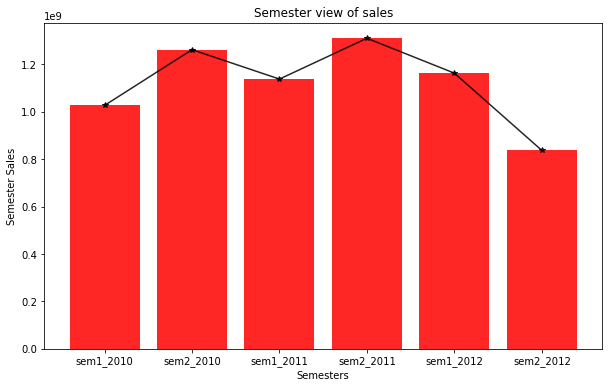

In [43]:
plt.figure(figsize=(10,6))
plt.bar(walmart_df.index,walmart_df["Weekly_Sales"],alpha=0.85,color='Red')
plt.plot(walmart_df.index,walmart_df["Weekly_Sales"],alpha=0.85,marker='*',color='Black')
plt.xlabel("Semesters")
plt.ylabel("Semester Sales")
plt.title("Semester view of sales")

In [19]:
# statistical model
# To build a prediction model for store 1

sales_new = sales[sales["Store"]==1].sort_values(by="Date").reset_index()

#Restructure the dates from jan 10'2010 as day 1

sales_new["Day_new"]= sales_new.index+1
sales_new.head(10)

,index,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Day_new
0,34,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838,10,1,2010,1
1,8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,4,2,2010,2
2,21,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787,7,2,2010,3
3,2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,4
4,3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,5
5,30,1,2010-03-09,1540163.53,0,81.21,2.577,211.531248,7.787,9,3,2010,6
6,43,1,2010-03-12,1548033.78,0,49.27,2.708,211.607193,7.838,12,3,2010,7
7,6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,19,3,2010,8
8,7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,26,3,2010,9
9,17,1,2010-04-06,1615524.71,0,80.69,2.705,211.176428,7.808,6,4,2010,10


In [20]:
#creating feature and target arrays
x = sales_new[['Store','Fuel_Price','CPI','Unemployment']]
y = sales_new['Weekly_Sales']
x

,Store,Fuel_Price,CPI,Unemployment
0,1,2.603,211.671989,7.838
1,1,2.719,210.820450,7.808
2,1,2.669,211.223533,7.787
3,1,2.514,211.289143,8.106
4,1,2.561,211.319643,8.106
...,...,...,...,...
138,1,3.494,221.958433,6.908
139,1,3.594,223.425723,6.573
140,1,3.506,223.444251,6.573
141,1,3.688,221.725663,7.143


In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

#split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=120)

# Model Building
reg_all = LinearRegression(normalize=True) #instantiate the regressor,

#train the model #feed data to the  model
reg_all.fit(X_train, y_train) #fitting on training data

#prediction on test data
y_pred = reg_all.predict(X_test)



In [22]:
print(reg_all.intercept_)
print(reg_all.coef_)

-4896479.886394527
[     0.         -75239.60648228  25928.32152062 143805.10270186]


<AxesSubplot:>

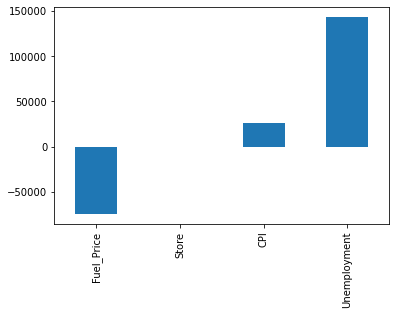

In [23]:
relation=pd.Series(reg_all.coef_,x.columns).sort_values()
relation.plot(kind="bar")

In [24]:
print('Accuracy:',reg_all.score(X_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 11.202300833725253
Mean Absolute Error: 88238.04791792025
Mean Squared Error: 13528318683.05324
Root Mean Squared Error: 116311.30075385298


In [99]:
#change of dates to days
sales['Days'] = pd.to_datetime(sales['Date']).dt.day_name()
sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Days
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,Friday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012,Thursday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012,Monday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,Friday


In [142]:
# data for polynomial regression

X_feature = sales[sales['Store'] ==1][['Store','CPI', 'Unemployment','Fuel_Price']]
print(X_feature.head())
#Target
y_target = sales[sales['Store']==1][['Store','Weekly_Sales']] #Store 1 Weekly_Sales is the target
print(y_target.head())

   Store         CPI  Unemployment  Fuel_Price
0      1  211.096358         8.106       2.572
1      1  211.242170         8.106       2.548
2      1  211.289143         8.106       2.514
3      1  211.319643         8.106       2.561
4      1  211.350143         8.106       2.625
   Store  Weekly_Sales
0      1    1643690.90
1      1    1641957.44
2      1    1611968.17
3      1    1409727.59
4      1    1554806.68


In [144]:
# Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Degree of polynomial is 3
PolyReg = PolynomialFeatures(degree = 3)
#Transform features for polynomial regression 
X_feature_PolyReg = PolyReg.fit_transform(X_feature)

# Pipeline is created by creating a list of tuples including the name of model or estimator and its correspondign constructor
#for Polynomial regression
Pip_Input =[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
# Pipeline the above input
pipe = Pipeline(Pip_Input)
print(pipe)


# Fit the model and predicting the first four 'Weekly_Sales' using Polynomial regression
pipe.fit(X_feature_PolyReg,y_target)

Ypipehat = pipe.predict(X_feature_PolyReg)
print(Ypipehat[0:4])


#shape of features in Polyreg
print(X_feature.shape)
print(X_feature_PolyReg.shape)


from math import sqrt
from sklearn. metrics import r2_score
from sklearn.metrics import mean_squared_error

#Root mean square error value and score(Accuracy) calculation
r_squared = r2_score(y_target, Ypipehat)
print('R-squared :', r_squared)
print('RMSE:' , sqrt(mean_squared_error(y_target,Ypipehat)))

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])
[[1.000000e+00 1.671584e+06]
 [1.000000e+00 1.568736e+06]
 [1.000000e+00 1.635136e+06]
 [1.000000e+00 1.435456e+06]]
(143, 4)
(143, 35)
R-squared : 0.8509254518051932
RMSE: 60013.50032850766
